In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler # for scaling data
from sklearn.cluster import KMeans #For clustering by using K-means algorithm
from scipy.spatial.distance import cdist

Tụi em đã tách ra từng cái file exel riêng

In [78]:
Customer_Master = 'Customer_Master.xlsx'
Customer_Master_data = pd.read_excel('Customer_Master.xlsx',engine='openpyxl')
Customer_Master_data

,CustomerRef,CustomerName,SoldToCode,SoldToName,MajorAccount,MajorAccountCode,MajorAccountCode.1,Channel,SubChannel,Longitude,Latitude,City,State,Country,SalesOrganization,Region
0,1000125,Customer 1,4002351,Company 1,Export,92468.0,92345.0,Export,Export,100.777442,13.746792,Bangkok,Thailand,Thailand,Organization 2,NaN
1,1000343,Customer 2,4002351,Company 1,Export,92468.0,92345.0,Export,Export,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1001879,Customer 3,4002351,Company 1,Export,92468.0,92345.0,Export,Export,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001880,Customer 4,4002351,Company 1,Export,92468.0,92345.0,Export,Export,121.471181,31.233623,Shanghai,China,China,Organization 2,NaN
4,1002325,Customer 5,4002351,Company 1,Export,92468.0,92345.0,Export,Export,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,2011528,Customer 857,12000426,NaN,Account 99,92471.0,92348.0,Domestic,Other,145.156241,-38.094313,Frankston,Victoria,Australia,NaN,Greater Melbourne
855,2007503,Customer 856,2007501,NaN,Export,NaN,NaN,Export,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
856,4014549,Customer 774,14017621,Company 414,Account 18,91413.0,91290.0,Grocery,Supermarkets,145.136628,-37.952852,Kingston,Victoria,Australia,NaN,Greater Melbourne
857,4004674,Customer 858,4010314,NaN,Export,NaN,NaN,Export,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
Customer_Master_data = Customer_Master_data[Customer_Master_data['Country'].isin(['Australia'])]
Customer_Master_data

,CustomerRef,CustomerName,SoldToCode,SoldToName,MajorAccount,MajorAccountCode,MajorAccountCode.1,Channel,SubChannel,Longitude,Latitude,City,State,Country,SalesOrganization,Region
38,1047983,Customer 39,14008706,Company 2,Account 1,92579.0,92456.0,Domestic,Wholesalers/Dist's,152.947407,-27.562473,Brisbane,Queensland,Australia,Organization 2,Greater Brisbane
45,1058155,Customer 46,12000344,Company 3,Account 2,92527.0,92404.0,Domestic,Dry Blender,145.638005,-35.911935,Moira,Victoria,Australia,NaN,Shepparton
47,11000128,Customer 48,11000128,Company 4,Account 3,91363.0,91240.0,Foodservice,National Distributor,145.206237,-38.025962,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne
48,11000139,Customer 49,11000139,Company 5,Account 4,91418.0,91295.0,Foodservice,National Distributor,145.280163,-37.845441,Knox,Victoria,Australia,Organization 1,Greater Melbourne
49,11000144,Customer 50,11000144,Company 6,Account 4,91418.0,91295.0,Foodservice,National Distributor,144.947676,-37.728991,Moreland,Victoria,Australia,Organization 1,Greater Melbourne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,14022378,Customer 657,11002783,Company 292,Account 62,92441.0,92318.0,Domestic,Wholesalers/Dist's,150.879636,-33.786112,Blacktown,New South Wales,Australia,NaN,Greater Sydney
852,14022384,Customer 658,12000162,Company 263,Account 36,92532.0,92409.0,Domestic,Dairy,144.740119,-37.832533,Wyndham,Victoria,Australia,NaN,Greater Melbourne
853,14022441,Customer 659,11001014,Company 79,Account 5,91401.0,91278.0,Foodservice,Independent Distributor,116.006693,-31.845847,Swan,Western Australia,Australia,NaN,Perth
854,2011528,Customer 857,12000426,NaN,Account 99,92471.0,92348.0,Domestic,Other,145.156241,-38.094313,Frankston,Victoria,Australia,NaN,Greater Melbourne


In [80]:
Sale_Order = 'Sales_Order.xlsx'
Sale_Order_data = pd.read_excel(Sale_Order)
Sale_Order_data

,SOCreationDate,OrderNumber,OriginRef,ProductID,CustomerRef,DeliveryDate,GoodsIssueDate,RequestedDelivDate,Channel,SalesOrganization,OrderQuantityInKg,DispatchQuantityInKg,GrossWeightInKg,NetWeightInKg
0,2021-08-01,5233831,A093,105181,14020636,NaT,NaT,2021-08-05,GR,Organization 1,5529.60,5529.60,6174.720,5529.60
1,2021-08-01,5233831,A093,112442,14020636,NaT,NaT,2021-08-05,GR,Organization 1,1920.00,1920.00,2035.200,1920.00
2,2021-08-01,5233831,A093,112466,14020636,NaT,NaT,2021-08-05,GR,Organization 1,4416.00,4416.00,4581.600,4416.00
3,2021-08-01,5233831,A093,112467,14020636,NaT,NaT,2021-08-05,GR,Organization 1,1920.00,1920.00,2020.800,1920.00
4,2021-08-01,5233831,A093,3110207,14020636,NaT,NaT,2021-08-05,GR,Organization 1,1728.00,1728.00,1786.752,1728.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370143,2022-12-31,5783497,A044,3110687,11002626,2023-01-01,2023-01-01,2023-01-01,GR,Organization 1,11911.68,11911.68,12243.840,11911.68
370144,2022-12-31,5783521,A003,104464,11002425,2023-01-04,2023-01-04,2023-01-04,GR,Organization 1,76.80,76.80,83.520,76.80
370145,2022-12-31,5783521,A003,105189,11002425,2023-01-04,2023-01-04,2023-01-04,GR,Organization 1,537.60,537.60,584.640,537.60
370146,2022-12-31,5783521,A003,112489,11002425,2023-01-04,2023-01-04,2023-01-04,GR,Organization 1,355.20,355.20,368.520,355.20


In [81]:
Product_Master = 'Product_Master.xlsx'
Product_Master_data = pd.read_excel(Product_Master)
Product_Master_data

,ProductID,ProductName,Category,SubCategory,BaseUnit,ShelfLifeInDays,KgPerCarton,KgPerLiter,StorageCondition,TempCondition,m^3PerCarton,KgPerPallet,CartonsPerPallet,Unit,UnitperCarton,Type
0,3110922,AW MLK WHOLE CN 9X1L BOT EXP,Consumer Dairy Liquid,Fresh White Milk,CAR,21,9.297,1.033000,Chilled,+2 Degrees,0.013,929.700,100.0,GBOT,9,1L
1,3113090,NAC AE WHIPD CRM 12X400G CTN,Consumer Dairy Liquid,Fresh Cream,CAR,365,4.800,1.000000,Chilled,+2 Degrees,0.015,403.200,84.0,CTN,12,400G
2,3112144,NAC AE WHIPD CRM 9X400G CTN,Consumer Dairy Liquid,Fresh Cream,CAR,365,3.600,1.000000,Chilled,+2 Degrees,0.012,345.600,96.0,CTN,9,400G
3,116052,NAC UHT CRM CUL CRM AU 12X1L CTN,Consumer Dairy Liquid UHT,UHT Cream,CAR,270,12.144,1.012000,Chilled,+2 Degrees,0.015,910.800,75.0,CTN,12,1L
4,115532,NAC UHT CRM EX YD AU 12X1L,Consumer Dairy Liquid UHT,UHT Cream,CAR,270,12.348,1.029000,Chilled,+2 Degrees,0.015,926.100,75.0,CTN,12,1L
5,121412,NAC UHT CRM EX YD AU 12X1L HCAP,Consumer Dairy Liquid UHT,UHT Cream,CAR,270,12.288,1.024000,Chilled,+4 Degrees,0.016,921.600,75.0,CTN,12,1L
6,121442,NAC UHT CRM WHIPG 12X1L HCAP,Consumer Dairy Liquid UHT,UHT Cream,CAR,270,12.000,1.000000,Chilled,+4 Degrees,0.016,900.000,75.0,CTN,12,1L
7,115906,NAC UHT CRM WHIPG AU 12X1L,Consumer Dairy Liquid UHT,UHT Cream,CAR,270,12.120,1.010000,Chilled,+2 Degrees,0.015,909.000,75.0,CTN,12,1L
8,121380,NAC UHT CUL CRM AU 12X1L HCAP,Consumer Dairy Liquid UHT,UHT Cream,CAR,270,12.096,1.008000,Chilled,+4 Degrees,0.016,907.200,75.0,CTN,12,1L
9,121441,NAC UHT MLK BISTA 12X1L HCAP,Consumer Dairy Liquid UHT,UHT White Milk,CAR,270,12.408,1.034000,Chilled,Ambient,0.016,1054.680,85.0,CTN,12,1L


In [82]:
Sale_Order_data = Sale_Order_data[Sale_Order_data['ProductID'].isin(Product_Master_data['ProductID'])]
Sale_Order_data 

,SOCreationDate,OrderNumber,OriginRef,ProductID,CustomerRef,DeliveryDate,GoodsIssueDate,RequestedDelivDate,Channel,SalesOrganization,OrderQuantityInKg,DispatchQuantityInKg,GrossWeightInKg,NetWeightInKg
12,2021-08-02,5233870,A044,3110685,14019842,NaT,NaT,2021-08-03,GR,Organization 1,57224.8944,57224.8944,58697.5260,57224.8944
28,2021-08-02,5233874,A044,3110678,14019842,NaT,NaT,2021-08-03,GR,Organization 1,77232.0384,77232.0384,79387.7568,77232.0384
47,2021-08-02,5233877,A044,3103449,14019842,NaT,NaT,2021-08-03,GR,Organization 1,13387.6800,13387.6800,13732.2000,13387.6800
48,2021-08-02,5233877,A044,3103450,14019842,NaT,NaT,2021-08-03,GR,Organization 1,2380.0320,2380.0320,2446.4640,2380.0320
99,2021-08-02,5234064,A044,3110656,11002626,NaT,NaT,2021-08-02,GR,Organization 1,7147.0080,7147.0080,7330.7520,7147.0080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370139,2022-12-31,5783479,A044,3110687,11002626,2022-12-31,2022-12-31,2022-12-31,GR,Organization 1,11911.6800,11911.6800,12243.8400,11911.6800
370140,2022-12-31,5783497,A044,3110656,11002626,2023-01-01,2023-01-01,2023-01-01,GR,Organization 1,8338.1760,8338.1760,8552.5440,8338.1760
370141,2022-12-31,5783497,A044,3110678,11002626,2023-01-01,2023-01-01,2023-01-01,GR,Organization 1,32130.4320,32130.4320,33027.2640,32130.4320
370142,2022-12-31,5783497,A044,3110685,11002626,2023-01-01,2023-01-01,2023-01-01,GR,Organization 1,15470.2080,15470.2080,15868.3200,15470.2080


In [83]:
Customer_Master_data = Customer_Master_data[Customer_Master_data['CustomerRef'].isin(Sale_Order_data['CustomerRef'])]
Customer_Master_data

,CustomerRef,CustomerName,SoldToCode,SoldToName,MajorAccount,MajorAccountCode,MajorAccountCode.1,Channel,SubChannel,Longitude,Latitude,City,State,Country,SalesOrganization,Region
47,11000128,Customer 48,11000128,Company 4,Account 3,91363.0,91240.0,Foodservice,National Distributor,145.206237,-38.025962,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne
49,11000144,Customer 50,11000144,Company 6,Account 4,91418.0,91295.0,Foodservice,National Distributor,144.947676,-37.728991,Moreland,Victoria,Australia,Organization 1,Greater Melbourne
50,11000149,Customer 51,11000149,Company 7,Account 3,91363.0,91240.0,Foodservice,National Distributor,152.519049,-32.197687,Great Lakes,New South Wales,Australia,Organization 1,Mid North Coast
51,11000159,Customer 52,11000159,Company 8,Account 3,91363.0,91240.0,Foodservice,National Distributor,153.122555,-27.617230,Logan,Queensland,Australia,Organization 1,Greater Brisbane
52,11000176,Customer 53,11000176,Company 9,Account 4,91418.0,91295.0,Foodservice,National Distributor,145.197119,-37.990926,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,14021924,Customer 639,11002237,Company 211,Account 11,91379.0,91256.0,Foodservice,Global QSR Distributor,153.118374,-27.445906,Brisbane,Queensland,Australia,NaN,Greater Brisbane
821,14022011,Customer 640,14001726,Company 305,Account 3,91363.0,91240.0,Foodservice,National Distributor,153.103894,-27.425455,Brisbane,Queensland,Australia,NaN,Greater Brisbane
841,14022270,Customer 650,11000312,Company 27,Account 6,91346.0,91223.0,Foodservice,National Distributor,144.371612,-38.054289,Greater Geelong,Victoria,Australia,NaN,Ballarat & Geelong
850,14022376,Customer 855,14022376,Company 499,Account 14,91437.0,91314.0,Foodservice,National Distributor,147.383224,-35.121731,Wagga Wagga,New South Wales,Australia,NaN,Riverina


Do khách hàng có vị trí khác nhau nên việc phân cụm dựa trên Kinh độ (Longitude) và dựa trên Vĩ độ(Latitude)

In [84]:
data = Customer_Master_data[['Longitude','Latitude']]
data

,Longitude,Latitude
47,145.206237,-38.025962
49,144.947676,-37.728991
50,152.519049,-32.197687
51,153.122555,-27.617230
52,145.197119,-37.990926
...,...,...
818,153.118374,-27.445906
821,153.103894,-27.425455
841,144.371612,-38.054289
850,147.383224,-35.121731


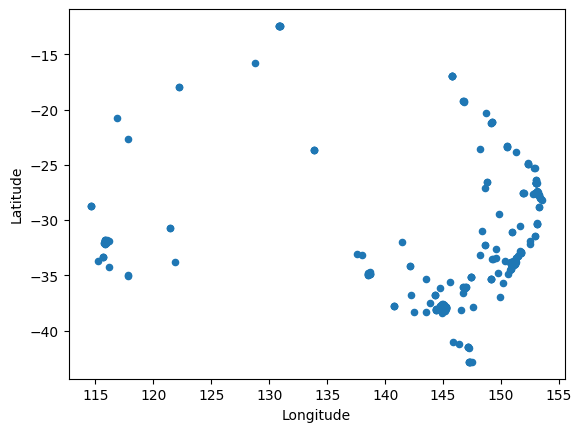

In [85]:
#Scatter plot
#vẽ đồ thị trực quan dữ liệu 
data.plot(kind= 'scatter',x = 'Longitude',y = 'Latitude')
plt.show()

In [86]:
#Dùng hàm .corr để tương quan giữa LLatitude và Longitude
data = data.reset_index(drop=True)
data.corr()

,Longitude,Latitude
Longitude,1.000000,-0.070701
Latitude,-0.070701,1.000000


In [87]:
#Standardization: x_stand = (x-mean(x))/Standard Deviation
sc = StandardScaler()
data_stand = sc.fit_transform(data)
data_stand

array([[ 1.67710508e-01, -9.79263193e-01],
       [ 1.45620939e-01, -9.31227846e-01],
       [ 7.92463711e-01, -3.65352625e-02],
       [ 8.44022842e-01,  7.04356944e-01],
       [ 1.66931542e-01, -9.73596045e-01],
       [-1.05816969e+00,  3.16069867e+00],
       [-2.33413079e+00, -4.57549807e-03],
       [ 1.38913815e-01, -9.28268988e-01],
       [ 3.73522148e-01, -9.47544291e-01],
       [ 9.45309706e-02, -9.92528938e-01],
       [ 7.79246249e-01,  1.14988937e+00],
       [ 6.83609645e-01,  1.31533088e+00],
       [ 6.20155422e-01,  1.39902792e+00],
       [-4.03635142e-01, -4.62935601e-01],
       [ 3.17859438e-01, -6.58230657e-01],
       [ 7.18485070e-01,  2.35603370e-01],
       [ 8.40971092e-01,  7.30456285e-01],
       [ 2.14420001e-01,  2.42862170e+00],
       [ 5.04875758e-01, -5.41994045e-01],
       [ 6.86733816e-01, -2.33022810e-01],
       [ 8.41194917e-01,  2.63063034e-01],
       [-1.05215845e+00,  3.15574151e+00],
       [ 9.72390501e-02, -1.00478520e+00],
       [ 8.

In [88]:
#Chuyển đổi dữ liệu thành dạng dataframe
data_stand = pd.DataFrame(data_stand, columns=['Longitude','Latitude'])
data_stand

,Longitude,Latitude
0,0.167711,-0.979263
1,0.145621,-0.931228
2,0.792464,-0.036535
3,0.844023,0.704357
4,0.166932,-0.973596
...,...,...
309,0.843666,0.732069
310,0.842429,0.735377
311,0.096406,-0.983845
312,0.353696,-0.509502


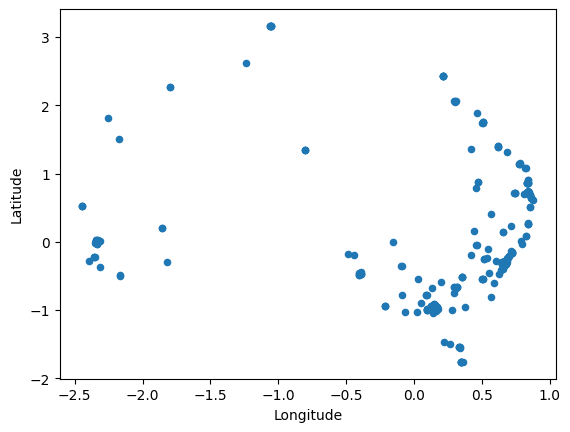

In [89]:
#Thay thế tập dữ liệu sau khi chuẩn hóa
data_stand.plot(kind= 'scatter',x = 'Longitude',y = 'Latitude')
plt.show()

In [90]:
#Phương pháp khuỷu tay để giảm thiểu WCSS (Within-cluser Sum of Square)
sum_of_square_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k,)
    km = km.fit(data_stand)
    #sum_of_square_distances.append()
    sum_of_square_distances.append(sum(np.min(cdist(data_stand,km.cluster_centers_),axis=1)) / data_stand.shape[0]) 



d:\Applications\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Applications\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Applications\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Applications\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

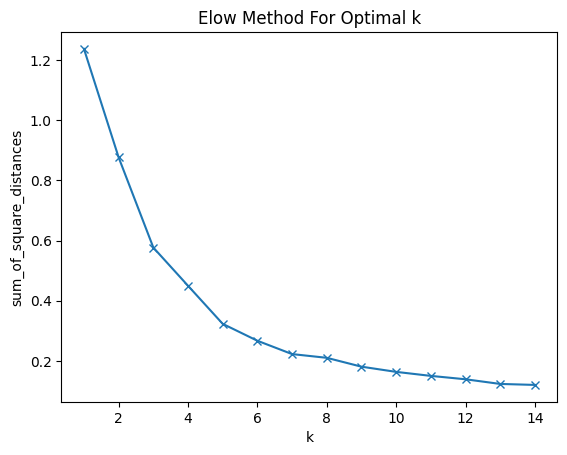

In [91]:
plt.plot(K,sum_of_square_distances,'x-')
plt.xlabel('k')
plt.ylabel('sum_of_square_distances')
plt.title('Elow Method For Optimal k')
plt.show()

Phần tử có khuỷu tay gấp nhất là 7

In [98]:
#using K-mean with k=7
km7 = KMeans(n_clusters=7)
km7 = km7.fit(data) #Học từ data ban đầu chưa stand

d:\Applications\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [99]:
print(km7.labels_)#clusters


[0 0 4 2 0 3 1 0 0 0 2 2 2 6 0 4 2 5 4 4 2 3 0 2 2 0 6 2 5 4 4 1 2 4 4 2 5
 4 4 0 1 0 0 0 4 6 0 0 5 2 5 5 0 2 0 2 4 0 4 6 4 4 4 0 6 4 2 4 1 0 1 1 0 0
 4 4 0 0 4 2 5 5 2 2 4 2 1 4 3 3 4 1 0 2 6 4 6 4 2 4 5 0 1 6 0 1 4 2 0 0 4
 0 4 6 0 1 4 2 4 1 6 0 0 5 0 0 0 0 0 4 2 4 2 5 2 2 1 4 4 1 2 1 4 4 2 2 2 4
 0 0 2 0 4 6 4 1 3 1 0 4 1 4 1 0 0 4 0 4 0 1 4 4 4 6 1 0 4 3 1 2 1 5 4 1 6
 0 2 4 1 2 5 0 4 3 1 2 4 3 3 4 0 2 2 2 6 0 4 0 1 4 4 2 0 1 4 1 4 2 4 2 6 5
 2 6 4 3 6 6 1 4 4 4 0 1 2 0 6 0 0 0 2 4 0 0 5 0 2 4 6 2 1 4 0 3 6 4 0 0 2
 0 2 2 1 1 2 0 2 5 4 1 4 0 0 0 2 4 2 6 0 6 4 3 0 6 0 4 0 2 4 0 0 3 0 2 6 0
 1 4 0 0 1 1 2 1 0 0 4 6 1 2 2 0 0 1]


Trực quan hoá các cụm

In [100]:
labels = km7.labels_
labels = pd.DataFrame(labels,columns=['cluster'])
data_clusterd = pd.concat([data,labels],axis=1)

In [101]:
data_clusterd

,Longitude,Latitude,cluster
0,145.206237,-38.025962,0
1,144.947676,-37.728991,0
2,152.519049,-32.197687,4
3,153.122555,-27.617230,2
4,145.197119,-37.990926,0
...,...,...,...
309,153.118374,-27.445906,2
310,153.103894,-27.425455,2
311,144.371612,-38.054289,0
312,147.383224,-35.121731,0


In [102]:
centroids = km7.cluster_centers_
centroids = pd.DataFrame(centroids,columns=['Centroid_Longitude','Centroid_Latitude'])
centroids

,Centroid_Longitude,Centroid_Latitude
0,145.537518,-38.126092
1,116.350438,-31.566376
2,152.483737,-27.030168
3,130.074713,-16.144207
4,150.794015,-33.619848
5,147.415733,-19.455574
6,139.302433,-34.977304


d:\Applications\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Applications\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Applications\Python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Centroid_Longitude', ylabel='Centroid_Latitude'>

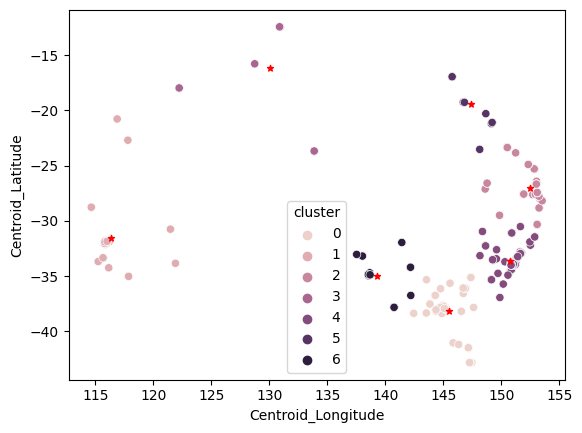

In [103]:
import seaborn as sns 
s1 = sns.scatterplot(data = data_clusterd ,x ='Longitude',y='Latitude',hue='cluster')
centroids.plot(ax = s1 , kind='scatter',x ='Centroid_Longitude', y='Centroid_Latitude',color = 'red', marker = '*' )
# plt.scatter(km7.cluster_centers_[:, 0], km7.cluster_centers_[:, 1], c='green', marker='*', label='Cluster Centers')